<a href="https://colab.research.google.com/github/jabazer/tao-fing/blob/master/Dualidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Teoría y Algoritmos de Optimización
Martes 28 de setiembre de 2021

Juan Bazerque


##Dualidad

A partir de un problema convexo o no, vamos a definir su problema dual.

Sea el problema primario (P) en su forma estandar


\begin{align}
(P)\ \min_{x\in  X}\ &f(x)\\
s. to:\ &g_i(x)\leq 0,\ i=1,\ldots,M\\ 
\ &h_j(x)= 0,\ j=1,\ldots,P.
\end{align}

##Razones para definir el dual

1) El problema dual es siempre **convexo**, incluso si el primario no lo es.

2) **Dualidad débil:** el problema dual da una cota inferior que es útil en el análisis del problema original, en particular cuando éste no es convexo.

3)  **Dualidad fuerte:** si hay dualidad fuerte, entonces de resolver el problema dual resultan los multiplicadores de Lagrange óptimos $\mu^*$ y $\lambda^*$. 

4) El dual puede ser **más sencillo**, como en el caso de que las variables del primario sean de alta dimensión, pero que haya pocas restricciones.

5) **Sensibilidad:**  $\mu$ y $\lambda$ nos dan una idea de precio por imponer restricciones.
 
6) Aparece una nueva clase de **algoritmos duales** que optimizan el problema primario subiendo por el dual.

##Procedimiento:

  **paso 1:** Escribir el Lagrangeano

$$L(x,\mu,\lambda):= f(x) +\sum_{i=1}^M \mu_i g_i(x) +\sum_{j=1}^P \lambda_j h_j(x) =f(x) +\mu' g(x) +\lambda' h(x)  $$

 **paso 2:** Obtener la función dual 

$$d(\mu,\lambda):= \inf_{x\in  X}L(x,\mu,\lambda)=\inf_{x\in  X}\{ f(x) +\mu' g(x) +\lambda' h(x)\} $$

 **paso 3:** Plantear el problema dual

\begin{align}
(D)\ \sup_{\mu\in\mathbb R^M,\lambda\in\mathbb R^P} & d(\mu,\lambda)\\
s. to:&\ \mu\geq 0 
\end{align}


donde la restricción $\mu\geq 0$ significa $\mu_i\geq 0,$ $i=1,\ldots,M$. 


## Ejemplo 

En este ejemplo se muestra como la pareja óptima $(x^\star,\mu^\star)$ cuyas entradas minimizan el primario y el dual, respectivamente, son un punto silla del lagrangeano.

\begin{align}
\min_{x\in \mathbb R}&\ x^2+1\\
\textrm{s. to:}&\ x\leq -1 
\end{align}

Lagrangeano 

\begin{align}
L(x,\mu)= x^2+1+\mu (x+1)\\
\end{align}

con mínimo en $x^\star(\mu)$ tal que

$2*x^\star(\mu)+\mu=0 \ \Rightarrow \ x^\star(\mu)=-\mu/2$

Dual $$d(\mu)=\inf_{x\in \mathbb R} L(x,\mu) =L(x^\star(\mu),\mu) = \frac{\mu^2}{4}+1+\mu\left(\frac{-\mu}{2}+1\right)=\frac{-\mu^2}{4}+\mu+1$$

Multiplicador óptimo

\begin{align}
\max_{\mu\geq 0}&\ \frac{-\mu^2}{4}+\mu+1\\
\end{align}


$$\frac{d}{d\mu} d(\mu) =-\mu/2+1=0$$



con máximo en $\mu^\star=2$ (verificar). Luego $x^\star=x^\star(\mu^\star)=-1$

Dualidad fuerte: $f(x^\star)=(-1)^2+1=2=\frac{-2^2}{4}+2+1=d(\mu^\star)$




/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


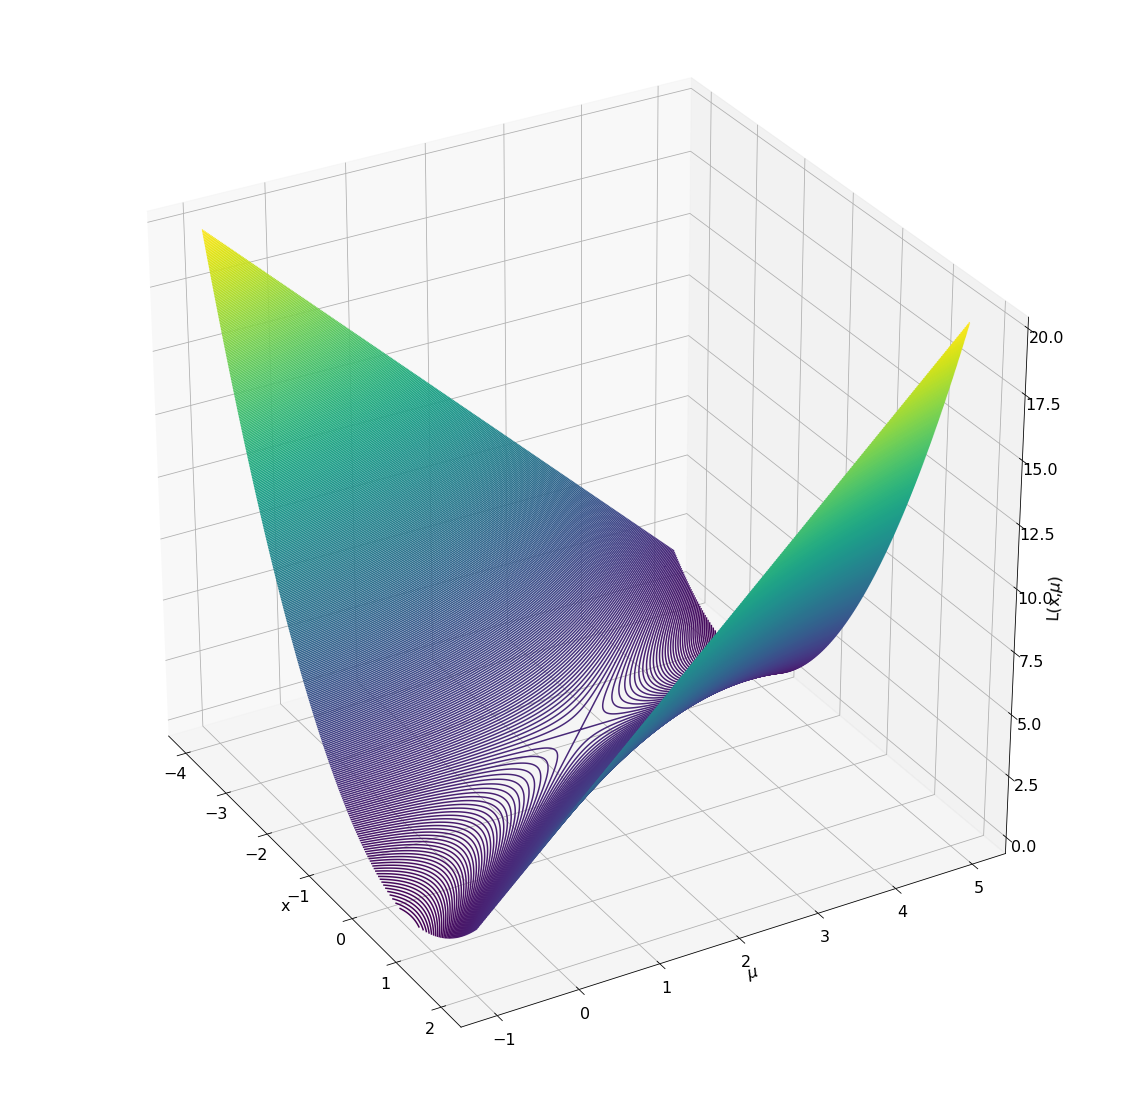

In [ ]:
import numpy as np
#import pandas as pd
#from google.colab import files
#import time
#import random
#import json
#import pickle
from matplotlib import pyplot as plt

# tamaño de la fuente
plt.rcParams.update({'font.size': 16})


from mpl_toolkits import mplot3d
#from matplotlib import pyplot as plt

#eigs=np.linalg.eig(P)
#print(eigs)


def Lagrangeano(X,M,lx,lm):
  
  Z=np.zeros((lm,lx))
  for i in range(0,lm):
    for j in range(0,lx):
      x=X[i,j]
      mu=M[i,j]
      
      #print(k)
      Z[i,j]= x*x+1+mu*(x+1)
  return Z
  

x = np.linspace(-4, 2, 1000)
mu = np.linspace(-1, 5, 1000)



X, M = np.meshgrid(x, mu)

Z = Lagrangeano(X, M,1000,1000)


mu = np.linspace(0, 2, 1000)



Xm, Mopt = np.meshgrid(x,mu)

Zm = Lagrangeano(Xm, Mopt, 1000,1000)




fig = plt.figure(figsize=(20,20))


ax = plt.axes(projection='3d')


ax.contour3D(X, M, Z,500)
ax.set_xlabel('x')
ax.set_ylabel('$\mu$')
ax.set_zlabel('L(x,$\mu$)');
ax.view_init(30, -30)





/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


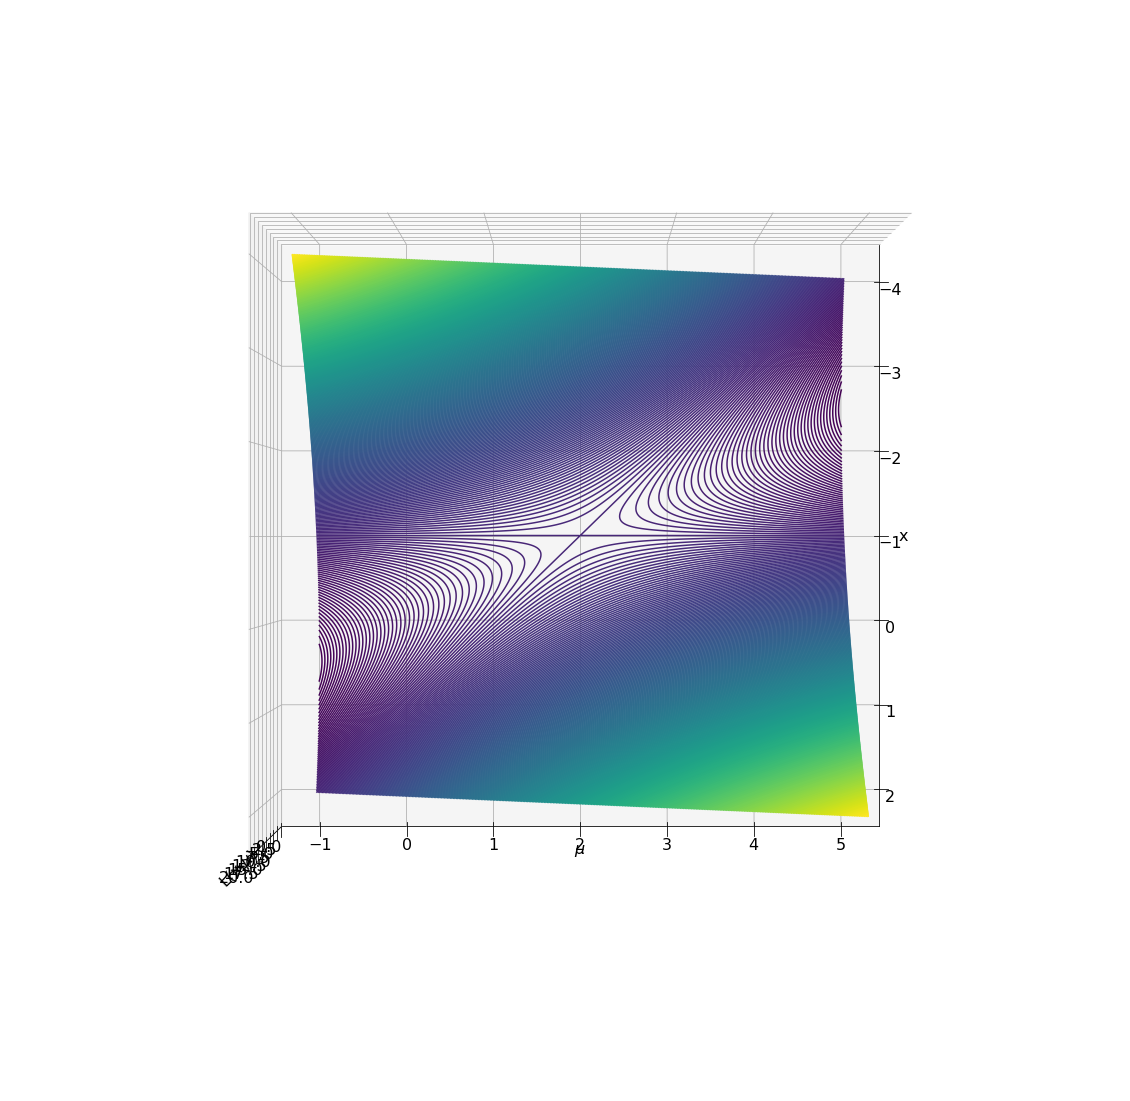

In [ ]:
fig = plt.figure(figsize=(20,20))


ax = plt.axes(projection='3d')


ax.contour3D(X, M, Z,500)
ax.set_xlabel('x')
ax.set_ylabel('$\mu$')
ax.set_zlabel('L(x,$\mu$)');
ax.view_init(90, 0)




/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


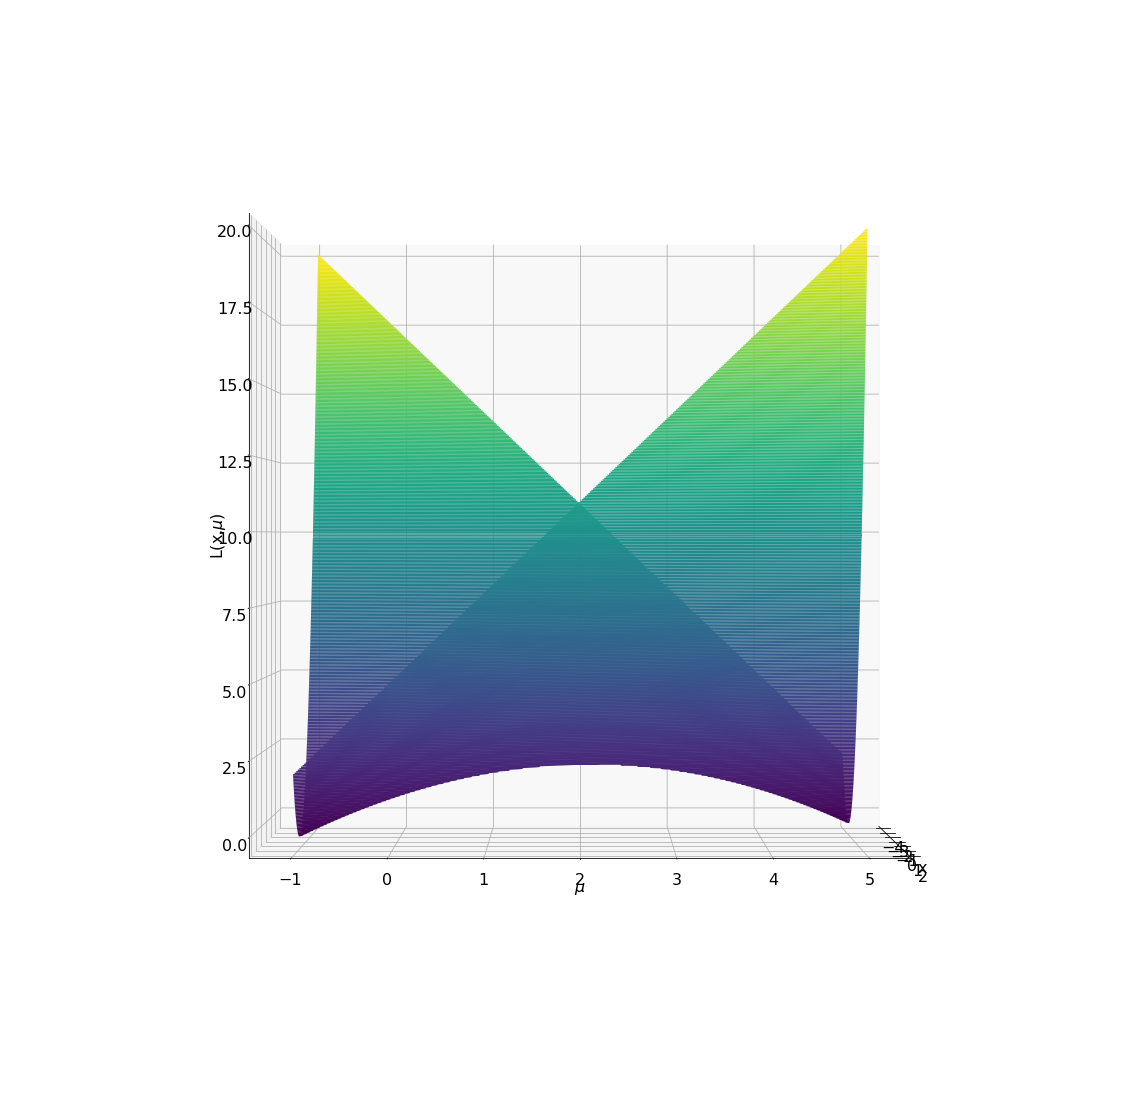

In [ ]:
fig = plt.figure(figsize=(20,20))


ax = plt.axes(projection='3d')


ax.contour3D(X, M, Z,500)
ax.set_xlabel('x')
ax.set_ylabel('$\mu$')
ax.set_zlabel('L(x,$\mu$)');
ax.view_init(0, 0)





/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


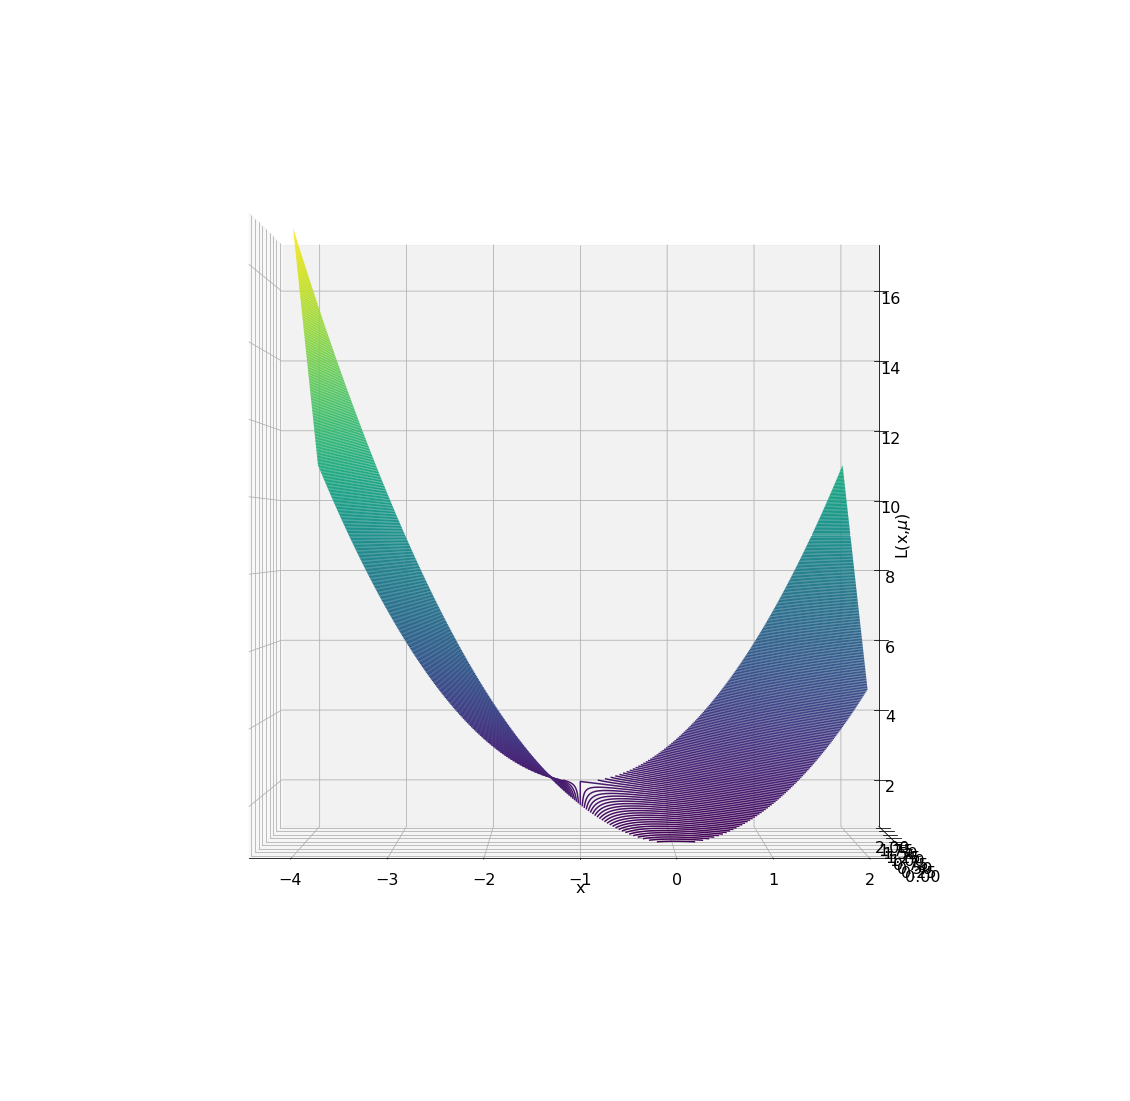

In [ ]:
fig = plt.figure(figsize=(20,20))




ax = plt.axes(projection='3d')


ax.contour3D(Xm, Mopt, Zm,500)
ax.set_xlabel('x')
ax.set_ylabel('$\mu$')
ax.set_zlabel('L(x,$\mu$)');
ax.view_init(0, -90)




En la primer gráfica se ve la forma del Lagrangeano como silla de montar.

En la segunda se muestra que el punto silla se da en $(x^\star,\mu^\star)=(-1,2)$. 

En la terceraa  se ve el dual como infimo del lagrangeano. 

En la cuarta se ve el efecto de agregar la pendiente $\mu(x-1)$ al costo original para distintos valores de $\mu$ entre $0$ y $2$. En particular $\mu=0$ recupera el costo original, y $\mu=2$ lo balancea para que el óptimo se de en $x=-1$ 

##Ejemplo lineal
\begin{align}
(P)\ \min_{(x,y)\in  R^2}\ &-x-y\\
s. to:\ &2x+y\leq 1\\
& x\geq 0\\
& y\geq 0
\end{align}

#Lagrangeano

\begin{align}
L(x,\mu)= &-x-y+ \mu_1(2x+y-1)-\mu_2x-\mu_3y\\
\end{align}


#Función dual

\begin{align}
d(\mu)&=\inf_{(x,y)\in\mathbb R^2}-x-y+ \mu_1(2x+y-1)-\mu_2x-\mu_3y\\
 &=\inf_{(x,y)\in\mathbb R^2} (2\mu_1-\mu_2-1)x +(\mu_1-\mu3-1)y-\mu_1
\end{align}




\begin{align}
d(\mu)= \begin{cases}-\mu_1\  \textrm{sii}\    (2\mu_1-\mu_2-1)= 0,\ (\mu_1-\mu3-1)= 0\\
-\infty\    \textrm{sino}\end{cases} 
\end{align}


#Problema dual
\begin{align}
(D)\ \sup_{(\mu_1,\mu_2,\mu_3)\in  R^3}\ &-\mu_1\\
s. to:\ &  (2\mu_1-\mu_2-1)= 0\\
&(\mu_1-\mu_3-1)= 0\\
&\mu_1\geq 0,\ \mu_2\geq 0,\ \mu_3\geq0
\end{align}




In [ ]:
import cvxpy as cp
x=cp.Variable(1)
y=cp.Variable(1)  
cost=-x-y
constraints =[2*x+y<=1, x>=0, y>=0]
prob = cp.Problem(cp.Minimize(cost),constraints)
prob.solve()

print("El costo óptimo es", prob.value)
print("La variable x óptima es, %s" %x.value)
print("La variable y óptima es, %s" %y.value)


El costo óptimo es -0.9999999993629554
La variable x óptima es, [1.12010598e-10]
La variable y óptima es, [1.]


In [ ]:
mu1=cp.Variable(1)
mu2=cp.Variable(1)  
mu3=cp.Variable(1)  

cost=-mu1
constraints =[mu1-mu3-1==0,2*mu1-mu2-1==0,mu1>=0,mu2>=0,mu3>=0]
prob = cp.Problem(cp.Maximize(cost),constraints)
prob.solve()

print("El costo óptimo es", prob.value)
print("La variable \mu_1 óptima es, %s" %mu1.value)
print("La variable \mu_2 óptima es, %s" %mu2.value)
print("La variable \mu_3 óptima es, %s" %mu3.value)


El costo óptimo es -0.9999999982041612
La variable \mu_1 óptima es, [1.]
La variable \mu_2 óptima es, [1.]
La variable \mu_3 óptima es, [-1.79580423e-09]


Resolvemos el Lagrangeano substituyendo los multiplicadores óptimos

$$L(x,y,1,1,0)=-x-y+(2x+y-1)-x=-1$$

##El mismo ejemplo sin dualizar $x\geq 0, y\geq 0$

##Ejemplo lineal
\begin{align}
(P)\ \min_{(x\geq 0,y\geq 0)}\ &-x-y\\
s. to:\ &2x+y\leq 1\\
\end{align}

#Lagrangeano

\begin{align}
L(x,\mu)= &-x-y+ \mu(2x+y-1)\\
\end{align}


#Función dual

\begin{align}
d(\mu)=&\inf_{x\geq 0,y\geq 0} -x-y+ \mu(2x+y-1)\\
&= \inf_{x\geq 0,y\geq 0} (2\mu-1)x +(\mu-1)y-\mu
\end{align}



\begin{align}
d(\mu)=\begin{cases} -\mu\  \textrm{sii}\    (2\mu-1)>= 0,\ (\mu-1)>= 0\\
-\infty\    \textrm{sino}\end{cases} 
\end{align}


#Problema dual
\begin{align}
(D)\ \sup_{\mu>=0}\ &-\mu\\
s. to:\ &  (2\mu-1)>= 0\\
&(\mu-1)>= 0
\end{align}

\begin{align}
(D)\ \sup_{\mu>=0}\ &-\mu\\
s. to:\ &  \mu>= 1/2\\
&\mu>= 1
\end{align}

Solución del dual

$$\mu^\star=1$$

Solución del primario usando el Lagrangeano con $\mu^\star=1$

\begin{align} \min_{x\geq 0,y\geq 0} L(x,y,1)\\
&=\min_{x\geq 0,y\geq 0} -x-y+(2x+y-1)\\
&= \min_{x\geq 0,y\geq 0} x-1\\
&=-1
\end{align}

Solución para $x^\star=0$.






#Complementary slackness
¿Cómo obtener la solución de un LP a partir de los multiplicadores?


Se tienen las $N+M$ incógnitas $\mu_1,\ldots \mu_M$ y $x_1,\ldots,x_N$ 

Luego el dual dará $N$ multiplicadores positivos $\mu_i>0$.
Las restricciones correspondientes están activas $g_i(x)=0$. 
Eso da un sistema de $N$ ecuaciones con $N$ incógnitas.

##Ejemplo no convexo

\begin{align}
(P)\ \min_{x>0}\ &1/3 x^3-2x\\
s. to:\ &x\leq 1\\ 
\end{align}


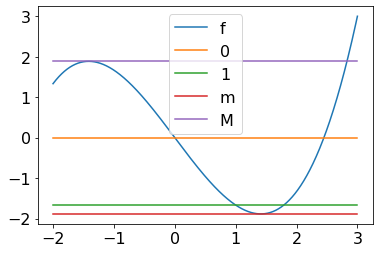

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
x = np.linspace(-2, 3, 1000)
f=(x)*(x)*(x)/3-2*x
plt.plot(x,f)
x0=0
f0=1/3*(x0)*(x0)*(x0)-2*(x0)
plt.plot(x,f0*(0*x+1))
x1=1
f1=1/3*(x1)*(x1)*(x1)-2*(x1)
plt.plot(x,f1*(0*x+1))

xm=np.sqrt(2)
fm=1/3*(xm)*(xm)*(xm)-2*(xm)
plt.plot(x,fm*(0*x+1))

xM=-np.sqrt(2)
fM=1/3*(xM)*(xM)*(xM)-2*(xM)
plt.plot(x,fM*(0*x+1))
plt.legend('f01mM')




Empezamos con el Lagrangeano

\begin{align}
L(x,\mu)= &1/3 x^3-2x+\mu(x-1)\\
\end{align}

Función dual

\begin{align}
d(\mu)= \inf_{x\geq 0}\ &1/3 x^3-2x+\mu(x-1)
\end{align}

Esta minimización no es trivial porque hay restricciones de berde y porque $L(x,\mu)$ no es convexo en $x$





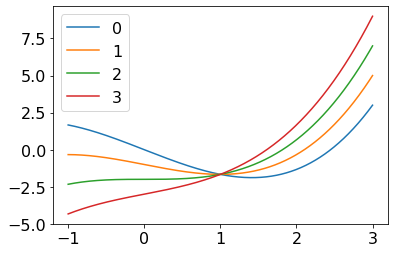

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
x = np.linspace(-1, 3, 1000)
f=1/3*np.power(x,3)-2*x+0*(x-1)
plt.plot(x,f)
f=1/3*np.power(x,3)-2*x+1*(x-1)
plt.plot(x,f)
f=1/3*np.power(x,3)-2*x+2*(x-1)
plt.plot(x,f)
f=1/3*np.power(x,3)-2*x+3*(x-1)
plt.plot(x,f)
plt.legend('0123')



Tenemos que separar casos en función de $\mu$

Vale derivar e igualar a cero, pero la solución solo nos da puntos críticos, hay que comprobar que sean mínimos globales

$$\frac{d}{dx}L(x,\mu)= x^2-2+\mu=0\ \Rightarrow\ x=\pm\sqrt{2-\mu}$$

Se debe comprobar por ejemplo que que exista, y que verifique $x\geq 0$. Además que la derivada segunda sea positiva, y que el mínimo no esté en el borde es decir $L(x,\mu)< L(0,\mu)=-\mu$.

$$x\geq 0\ \iff \mu\in [0, 2]$$

Para la derivada segunda  

$$\frac{d^2}{dx^2}L(x,\mu)= 2x \geq 0\ \iff\ x\geq 0$$ 
Entonces siempre elegimos la raiz positiva.  

Para la condición de borde $L(x,\mu)< L(0,\mu)$ 

\begin{align}&1/3 (\sqrt{2-\mu})^3 -2 \sqrt{2-\mu} +\mu \sqrt{2-\mu}-\mu <-\mu\\
&\iff\   1/3 (\sqrt{2-\mu})^3 -(2-\mu)\sqrt{2-\mu} < 0\\
&\iff\   1/3 (\sqrt{2-\mu})^3 -(2-\mu)\sqrt{2-\mu} < 0
 \end{align}

Se concluye que

$$x^\star(\mu)=\begin{cases}
\sqrt{2-\mu}\ \iff \mu\in [0,2)\\
0\ \iff \mu\geq 2\\
\end{cases}$$

y entonces

$$d(\mu)=\begin{cases}
1/3(\sqrt{2-\mu})^3 -2(\sqrt{2-\mu}) +\mu(\sqrt{2-\mu}-1) = -2/3 (\sqrt{2-\mu})^3 -\mu \ \iff \mu\in [0,2)\\
-\mu\ \iff \mu>2
\end{cases}
$$


¿Es cóncava? **Si siempre**


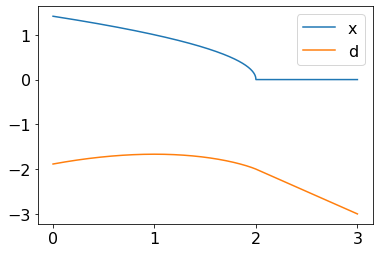

In [ ]:
mu = np.linspace(0, 3,1000)
xmu=(np.sqrt((2-mu*(mu<2))))*(mu<2)
plt.plot(mu,xmu)
d=1/3*(xmu)*(xmu)*(xmu)-2*xmu+mu*(xmu-1)
plt.plot(mu,d)
plt.legend('xd')


Ahora resolvemos el problema dual para obtener $\mu^\star$
\begin{align}
(D)\ \max_{\mu>0}\ &d(\mu)
\end{align}


Derivamos e igualamos a cero 


$$\frac{d}{d\mu} d(\mu) =  \sqrt{2-\mu} -1=0\ \iff\ \mu=1$$

Es máximo en $\mathbb R$ porque $d(\mu)$  es cóncava. Falta comparar con $d(0)$.


$$d(1)=-2/3-1=-5/3> -16/3 =d(0)$$

Luego $\mu^\star=1$

$d(\mu*)=-5/3$


##¿Se cumple dualidad fuerte?
 (no lo podemos garantizar si el problema no es convexo).


Tenemos el candidato al óptimo $x(\mu^\star)=1$, que mimimiza $L(x,\mu^\star)$





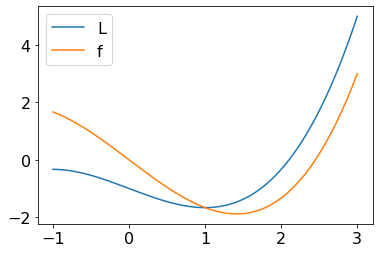

In [ ]:
f=1/3*(x)*(x)*(x)-2*x+1*(x-1)
plt.plot(x,f)

f=1/3*(x)*(x)*(x)-2*x
plt.plot(x,f)
plt.legend('Lf')

Entonces evaluamos $f(x)$ en este punto


$f(x(\mu^\star))= 1/3 -2=-5/3$


Por dualidad debil (siempre se cumple) $f(x)\geq d(\mu)$ para todo $x\geq 0$, $\mu\geq 0$.

Luego $f^\star=-5/3$ y $x^\star=1$

Repetimos con un problema intrinsecamente no convexo


\begin{align}
(P)\ \min_{x>0}\ &1/3 (x-3)^3-4(x-3)\\
s. to:\ &x\leq 3\\ 
\end{align}

Algunos valores notables $$f(0)=3$$ $$f(3)=0$$ $$f(5)=-16/3$$ $$f(1)=16/3$$ 

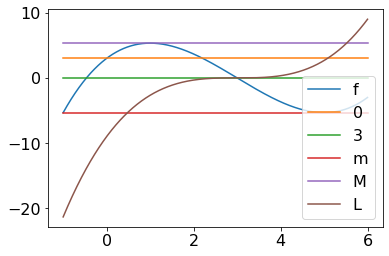

In [ ]:
x = np.linspace(-1, 6, 1000)
f=1/3*(x-3)*(x-3)*(x-3)-4*(x-3)
plt.plot(x,f)
x0=0
f0=1/3*(x0-3)*(x0-3)*(x0-3)-4*(x0-3)
plt.plot(x,f0*(0*x+1))
f3=0
plt.plot(x,f3*(0*x+1))

xm=3+2
fm=1/3*(xm-3)*(xm-3)*(xm-3)-4*(xm-3)
plt.plot(x,fm*(0*x+1))

xM=3-2
fM=1/3*(xM-3)*(xM-3)*(xM-3)-4*(xM-3)
plt.plot(x,fM*(0*x+1))

L4=1/3*(x-3)*(x-3)*(x-3)
plt.plot(x,L4)

plt.legend('f03mML')





Se ve en este ejemplo que para algunos valores de $\mu$ el Lagrangeano se minimiza en el cero de la derivada, y para otros en el borde $x=0$. Analicemos esto

$$L(x,\mu)=1/3 (x-3)^3+(\mu-4)(x-3)$$

En el borde $x=0$
$$L(0,\mu) =-9+12-3\mu=3(1-\mu)$$

Veamos donde se anula la derivada
$$\frac{dL}{dx}= (x-3)^2+\mu-4=0\ \Rightarrow (x-3)=\sqrt{4-\mu}$$

Si $\mu>4$ entonces la derivada no se anula y el m\'inimo est\'a en $x=0$

Si $\mu\leq 4$ entonces la derivada se anula en $x_0(\mu)=3+\sqrt{4-\mu}$

Veamos cuanto vale el Lagrangiano en $x_0(\mu)$

$$L(x_0(\mu),\mu)=1/3(\sqrt{4-\mu})^3+(4-\mu)\sqrt{4-\mu})=-2/3(\sqrt{4-\mu})^3$$

Luego, debemos comparar si 

$$x^\star(\mu)=\arg\min_x L(x,mu)=\begin{cases} 0 \ \iff L(0,\mu)\leq L(x_0(\mu),\mu)\\x_0(\mu) \ \iff L(0,\mu)\geq L(x_0(\mu),\mu) \end{cases}$$

Veamos cuando se da cada uno de los casos viendo donde se anula 

$z(\mu)=-2/3(\sqrt{4-\mu})^3-3(1-\mu)$

El m\'inimo del Lagrangiano se da en $x=0$ para los valores de $\mu$ tales que $z(\mu)>0$ 

$$z(0)=-16/3-3=-25/3<0$$ $$z(4)=9>0$$

El cero de $z(\mu)$ esta en el intervalo $(0,4)$, graficamente lo aproximamos a $\mu_0=7/4$

$$z(7/4)=-2/3(\sqrt{4-7/4})^3-3(1-7/4)=-2/3(\sqrt{9/4})^3+3(3/4)==-2/3(27/8)+9/4=0$$


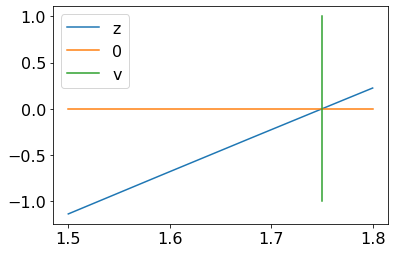

In [ ]:
mu = np.linspace(1.5, 1.8,1000)



z=-2/3*np.power(np.sqrt(4-mu),3)-3*(1-mu)
plt.plot(mu,z)
plt.plot(mu,0*(mu))
mu0=1.75
plt.plot([mu0,mu0],[-1,1])
plt.legend('z0v')





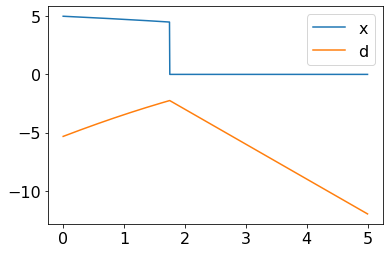

In [ ]:
mu = np.linspace(0, 5,1000)
xmu=(np.sqrt((4-mu)*(mu<4))+3)*(mu<mu0)
plt.plot(mu,xmu)
d=1/3*np.power(xmu-3,3)+(mu-4)*(xmu-3)
plt.plot(mu,d)
plt.legend('xd')


In [ ]:
xmustar=np.sqrt(4-mu0)+3

xstar=3
f=1/3*np.power(xstar-3,3)-4*(xstar-3)
d=1/3*np.power(xmustar-3,3)+(mu0-4)*(xmustar-3)

print(d,f)




-2.25 0.0


Complementary slackness

Queremos resolver 


\begin{align}
(P)\ \min_{(x,y)\in R^2}\ &4x^2+y^2-15x-xy\\
s. to:\ &x\geq 0\\
&x\leq 1\\&y\geq 0\\
&y\leq 1\\ 
\end{align}

$$L(x,y,\mu)=4x^2+y^2-15x-xy-\mu_1x+\mu_2(x-1)-\mu_3y+\mu_4(y-1)$$

$$\frac{dL}{dx} = 8x-15 -y -\mu_1 +\mu_2$$
$$\frac{dL}{dy} = 2y-x -\mu_3 +\mu_4$$

Por complementary slackness $$\mu_1 \neq  0 \Rightarrow x=0$$
$$\mu_2 \neq  0 \Rightarrow x=1$$
$$\mu_3 \neq  0 \Rightarrow y=0$$
$$\mu_4 \neq  0 \Rightarrow y=1$$

$$ x\neq 0 \Rightarrow \mu_1  =  0 $$
$$x\neq 1   \Rightarrow \mu_2=0$$
$$y\neq 0    \Rightarrow \mu_3=0$$
$$y\neq 1    \Rightarrow \mu_4=0$$

Podemos probar no considerar las restricciones, y ver si el óptimo está dentro del cuadrado, entonces $\mu_1=\mu_2=\mu_3=\mu_4=0$

$$8x-15-y=0$$
$$2y-x=0$$

Luego $y=1, x=2$ no sirve.


Ahora veamos si est\'a en el interior de la cara del cuadrado $x=1$

En este caso $\mu_1=\mu_3=\mu_4=0$

$$8x-15-y+\mu2=0$$
$$2y-x=0$$
$$x=1$$ 

Luego $$x=1, y=1/2$$ Est\'a en el interior de la cara. Es nuestro candidato al \'optimo. 

Comprobaci\'on te'orica. Minimiza el Lagrangeano y cumple Complementary Slackness, entonces es el \'optimo.






In [1]:
x=cp.Variable(1)
y=cp.Variable(1)  
cost=3.5*cp.square(x)+0.5*cp.square(y)-15*x+0.5*cp.square(x-y)
#cost=4*cp.square(x)+cp.square(y)-15*x-x*y
constraints =[x>=0,x<=1,  y>=0,y<=1]
prob = cp.Problem(cp.Minimize(cost),constraints)
prob.solve()

print("El costo óptimo es", prob.value)
print("La variable x óptima es, %s" %x.value)
print("La variable y óptima es, %s" %y.value)
print("$\mu_1=, %s" %constraints[0].dual_value)
print("$\mu_2=, %s" %constraints[1].dual_value)
print("$\mu_3=, %s" %constraints[2].dual_value)
print("$\mu_4=, %s" %constraints[3].dual_value)

NameError: ignored

En esta parte mostramos los algoritmos duales.

Empezamos por plantear el problema primario

\begin{align}
\min_{x\in \mathbb R} x^2+2\\
s.\ to:\ x\leq -1
\end{align}


El Lagrangiano es 

$$L(x,\mu)=x^2+2+\mu(x+1)$$

Que se minimiza en $x(\mu)=-\mu/2$.


Puede probarse que el subgradiente del dual es $\frac{d}{d\mu} d(\mu)=g(x(\mu))$ 
Luego en este caso $$\frac{d}{d\mu} d(\mu)=x(\mu)+1$$


Esto nos da el siguiente algoritmo de ascenso por el gradiente del dual (proyected gradient ascent) 

 $$\mu_{k+1}=proy_{\mu\geq 0} \left(\mu_k+\alpha_k g(x(\mu))\right)$$

o alternativamente

\begin{align}
x(\mu)&=-\mu/2\\
   \mu_{k+1}&=[\mu_k+\alpha_k(x(\mu)+1)]_+
   \end{align}

Veámoslo en acción
   

In [ ]:
mus=np.empty(50)
xs=np.empty(50)
mu=0

for k in np.arange(50): 
 
 xmu=-mu/2
 alpha_k=1/(k/10+1)
 mu=np.max(mu+alpha_k*(xmu+1))
 mus[k]=mu
 xs[k]=xmu

plt.plot(mus)
plt.show()
plt.plot(xs)

No es necesario calcular el duall, pero solo para comprobar

d(μ)=x(μ)2+2+μ(x(μ)+1)

In [ ]:
fs=np.empty(50)
ds=np.empty(50)
mu=0

for k in np.arange(50): 
 
 xmu=-mu/2
 alpha_k=1/(k/10+1)
 mu=np.max(mu+alpha_k*(xmu+1))
 
 
 fs[k]=xmu*xmu+2
 ds[k]=xmu*xmu+2+mu*(xmu+1)


plt.plot(ds)
plt.plot(fs)

Lo siguiente es repetir con un algoritmo primal dual

En vez de minimizar el Lagrangiano, hacemos un paso de decenso por el gradiente

$$\frac{dL}{dx}=2x+μ $$
$$\frac{d}{d\mu}d(\mu)=x(\mu)+1$$

In [ ]:
mus=np.empty(50)
xs=np.empty(50)
mu=0
x=0
for k in np.arange(50): 
 alpha_k=1/(k/10+1)
 x=x-alpha_k*(2*x+mu)
 mu=np.max(mu+alpha_k*(x+1))
 
 
 xs[k]=x
 mus[k]=mu


plt.plot(xs)
plt.plot(mus)




